In [11]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
file_path = "large_movies_data_with_details.csv"
df = pd.read_csv(file_path)
df.head()

# Extract genre information
df['genres'] = df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else [])

# Identify unique genres
unique_genres = set(genre['name'] for genres in df['genres'] for genre in genres)

# One-hot encoding
genre_columns = {genre: [] for genre in unique_genres}

for genres in df['genres']:
    genre_set = {genre['name'] for genre in genres}
    for genre in unique_genres:
        genre_columns[genre].append(1 if genre in genre_set else 0)

# Create transformed DataFrame
genre_df = pd.DataFrame(genre_columns)

# Print transformed data
print("Transformed DataFrame (First 5 Rows):\n", genre_df.head())

# Convert one-hot encoded DataFrame back into transactional format
transactions = []

for index, row in genre_df.iterrows():
    transaction = [genre for genre in genre_df.columns if row[genre] == 1]
    transactions.append(transaction)

# Print first 5 transactions (without labels)
print("\nTransaction Data (First 5 Rows):")
for i, transaction in enumerate(transactions[:5]):
    print(f"Transaction {i+1}: {transaction}")

# Apply Apriori algorithm with a lower support threshold
min_support = 0.05  # Lower threshold to discover less frequent patterns
frequent_itemsets = apriori(genre_df, min_support=min_support, use_colnames=True)

# Generate association rules with lower confidence and filter by lift
min_confidence = 0.5  # Lowering confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
rules = rules[rules['lift'] > 1.2]  # Filter rules with a significant lift

# Print results
print("\nFrequent Itemsets:\n", frequent_itemsets)
print("\nAssociation Rules:\n", rules)

Transformed DataFrame (First 5 Rows):
    Horror  Thriller  Romance  Science Fiction  Western  Action  Mystery  \
0       0         0        0                0        0       0        0   
1       0         0        0                1        0       1        0   
2       0         0        0                0        0       0        0   
3       0         0        0                0        0       0        0   
4       0         1        0                0        0       0        0   

   TV Movie  Crime  Fantasy  War  Drama  Music  History  Comedy  Adventure  \
0         0      1        0    0      0      0        0       1          0   
1         0      0        0    0      0      0        0       0          1   
2         0      1        0    0      1      0        0       1          0   
3         0      0        0    0      0      0        0       1          0   
4         0      1        0    0      0      0        0       0          0   

   Documentary  Family  Animation  
0    

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [12]:
# Select the top 15 rules based on Support
top_support_rules = rules.nlargest(15, 'support')

# Select the top 15 rules based on Confidence
top_confidence_rules = rules.nlargest(15, 'confidence')

# Select the top 15 rules based on Lift
top_lift_rules = rules.nlargest(15, 'lift')

# Print results
print("\nTop 15 Rules Based on Support:\n", top_support_rules)
print("\nTop 15 Rules Based on Confidence:\n", top_confidence_rules)
print("\nTop 15 Rules Based on Lift:\n", top_lift_rules)


Top 15 Rules Based on Support:
                      antecedents        consequents  antecedent support  \
5                    (Adventure)           (Action)            0.263636   
3              (Science Fiction)           (Action)            0.173636   
4              (Science Fiction)        (Adventure)            0.173636   
6                      (Fantasy)        (Adventure)            0.149091   
12                      (Family)        (Animation)            0.121818   
13                   (Animation)           (Family)            0.110909   
14     (Action, Science Fiction)        (Adventure)            0.110000   
15           (Action, Adventure)  (Science Fiction)            0.150909   
16  (Science Fiction, Adventure)           (Action)            0.092727   
10                      (Family)        (Adventure)            0.121818   
8                       (Family)           (Comedy)            0.121818   
1                        (Crime)         (Thriller)            0.12

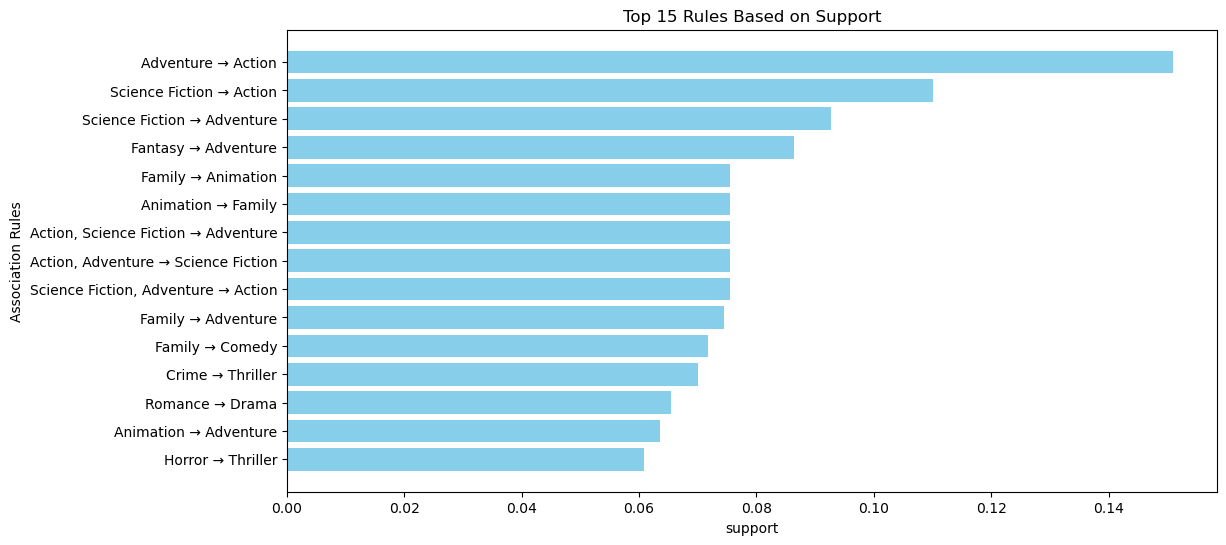

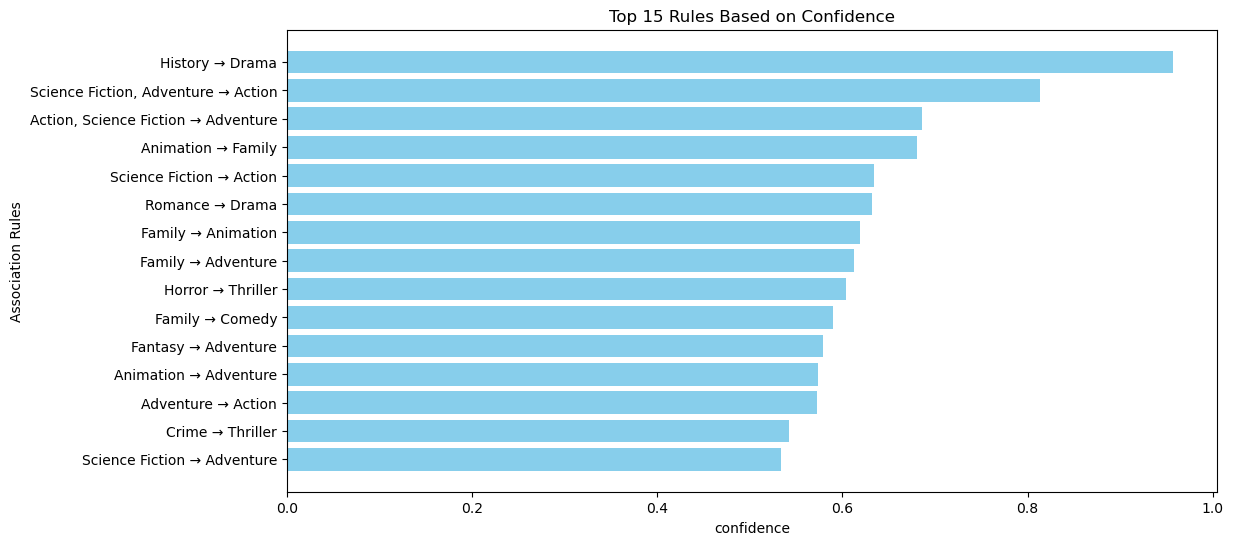

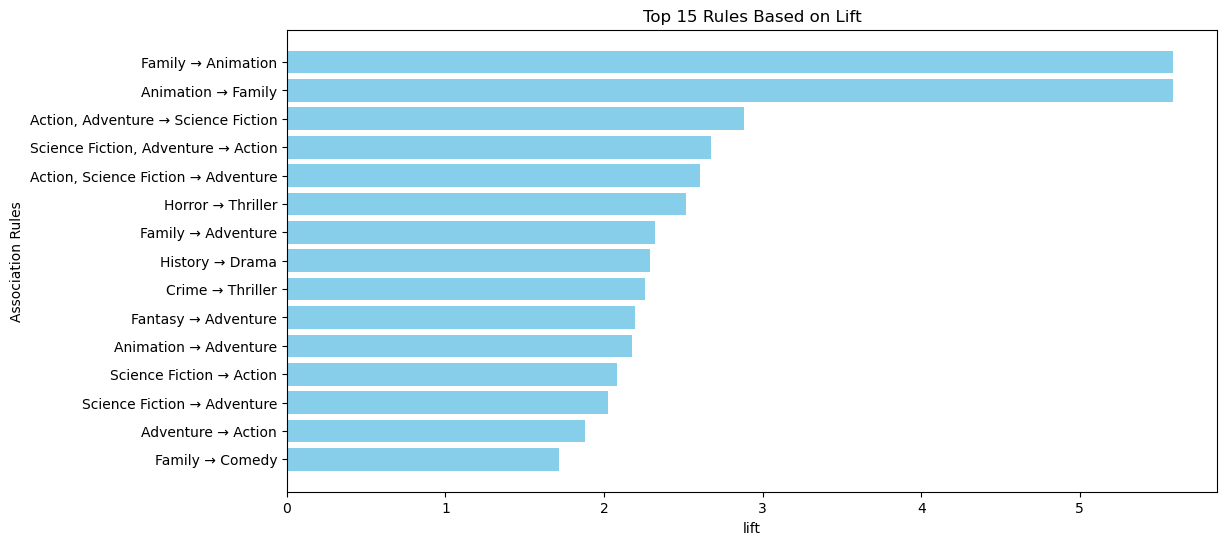

In [13]:
import matplotlib.pyplot as plt

# Function to plot top 15 rules safely
def plot_top_rules(rules_df, metric, title):
    top_rules = rules_df.nlargest(15, metric)
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(top_rules)), top_rules[metric], color='skyblue')
    
    # Convert antecedents and consequents to readable format
    rule_labels = [f"{', '.join(map(str, rule[0]))} → {', '.join(map(str, rule[1]))}" 
                   for rule in zip(top_rules["antecedents"], top_rules["consequents"])]
    
    plt.yticks(range(len(top_rules)), rule_labels)
    plt.xlabel(metric)
    plt.ylabel("Association Rules")
    plt.title(f"Top 15 Rules Based on {title}")
    plt.gca().invert_yaxis()
    plt.show()

# Plot top 15 rules for Support, Confidence, and Lift
plot_top_rules(rules, 'support', 'Support')
plot_top_rules(rules, 'confidence', 'Confidence')
plot_top_rules(rules, 'lift', 'Lift')


In [14]:
# Calculate lift explicitly
rules['calculated_lift'] = rules['confidence'] / rules['consequent support']

# Print the rules with lift calculation
print("\nAssociation Rules with Lift Calculation:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'calculated_lift']])


Association Rules with Lift Calculation:
                     antecedents        consequents   support  confidence  \
0                       (Horror)         (Thriller)  0.060909    0.603604   
1                        (Crime)         (Thriller)  0.070000    0.542254   
2                      (Romance)            (Drama)  0.065455    0.631579   
3              (Science Fiction)           (Action)  0.110000    0.633508   
4              (Science Fiction)        (Adventure)  0.092727    0.534031   
5                    (Adventure)           (Action)  0.150909    0.572414   
6                      (Fantasy)        (Adventure)  0.086364    0.579268   
7                      (History)            (Drama)  0.060000    0.956522   
8                       (Family)           (Comedy)  0.071818    0.589552   
9                    (Animation)           (Comedy)  0.055455    0.500000   
10                      (Family)        (Adventure)  0.074545    0.611940   
11                   (Animation)  